Data

Data contains 12330 web sessions with minority cases completing the purchase (revenue = True).  
The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label. 

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.


Objective: 
           	Train and test your models to predict customers making the purchase (Revenue = True)
	Rank the customers who did not make the purchase on their propensity to buy and justify the ranking/probability using any statistical/machine learning techniques 


In [288]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


os=pd.read_csv("data.csv")

In [289]:
print(os.shape)

(12330, 18)


In [290]:
print(os.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [291]:
print(os.Revenue.value_counts())

False    10422
True      1908
Name: Revenue, dtype: int64


In [292]:
os.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [293]:
os.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [294]:
# Geting the max,min,std,mean values of each attributes
os.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [295]:
os["Revenue"] = os["Revenue"].astype('category')
os.dtypes
os["Revenue_cat"] = os["Revenue"].cat.codes
os.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Revenue_cat
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0


In [296]:
os["VisitorType"] = os["VisitorType"].astype('category')
os.dtypes
os["VisitorType_cat"] = os["VisitorType"].cat.codes
os.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Revenue_cat,VisitorType_cat
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,2
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,2


In [297]:
os["Month"] = os["Month"].astype('category')
os.dtypes
os["Month_cat"] = os["Month"].cat.codes
os.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Revenue_cat,VisitorType_cat,Month_cat
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,0,2,2
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,0,2,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,4,1,9,3,Returning_Visitor,False,False,0,2,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,3,2,2,4,Returning_Visitor,False,False,0,2,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,3,3,1,4,Returning_Visitor,True,False,0,2,2


In [298]:
os.VisitorType_cat.value_counts()

2    10551
0     1694
1       85
Name: VisitorType_cat, dtype: int64

In [299]:
os.Revenue_cat.value_counts()

0    10422
1     1908
Name: Revenue_cat, dtype: int64

In [300]:
os.Month_cat.value_counts()

6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: Month_cat, dtype: int64

In [244]:
os.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Revenue_cat,VisitorType_cat,Month_cat
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,0,2,2
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,0,2,2


# UNIVARIANT 

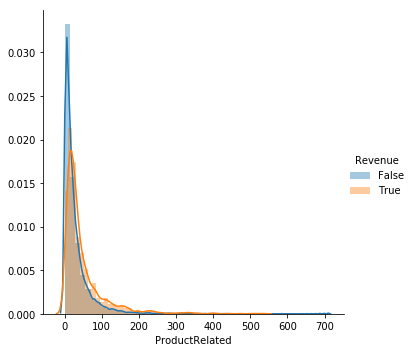

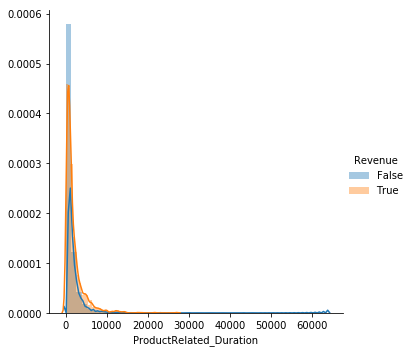

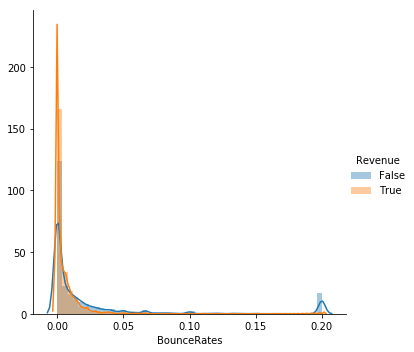

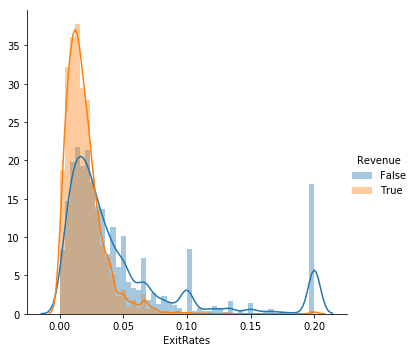

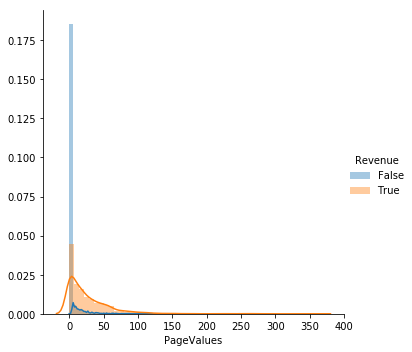

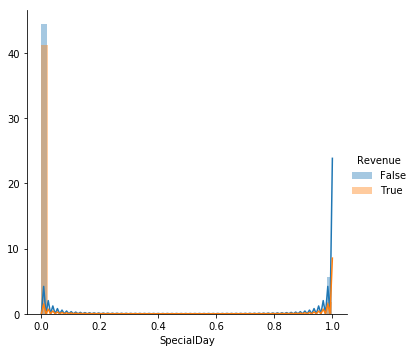

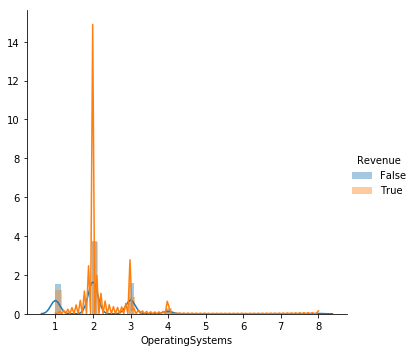

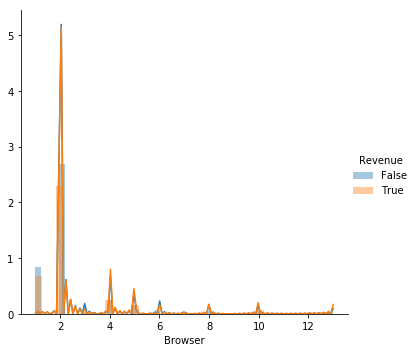

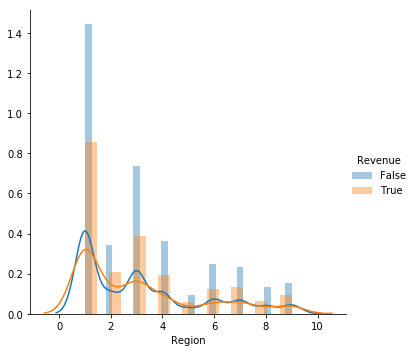

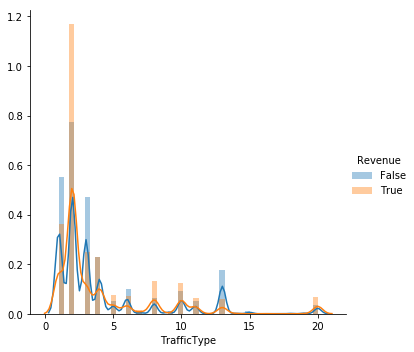

In [9]:
sns.FacetGrid(os,hue='Revenue',size=5).map(sns.distplot,'ProductRelated').add_legend()

sns.FacetGrid(os,hue='Revenue',size=5).map(sns.distplot,'ProductRelated_Duration').add_legend()

sns.FacetGrid(os,hue='Revenue',size=5).map(sns.distplot,'BounceRates').add_legend()

sns.FacetGrid(os,hue='Revenue',size=5).map(sns.distplot, 'ExitRates').add_legend()

sns.FacetGrid(os,hue='Revenue',size=5).map(sns.distplot,'PageValues').add_legend()

sns.FacetGrid(os,hue='Revenue',size=5).map(sns.distplot, 'SpecialDay').add_legend()

#sns.FacetGrid(os,hue='Revenue',size=5).map(sns.distplot,'Month').add_legend()

sns.FacetGrid(os,hue='Revenue',size=5).map(sns.distplot, 'OperatingSystems').add_legend()

sns.FacetGrid(os,hue='Revenue',size=5).map(sns.distplot,'Browser').add_legend()

sns.FacetGrid(os,hue='Revenue',size=5).map(sns.distplot, 'Region').add_legend()

sns.FacetGrid(os,hue='Revenue',size=5).map(sns.distplot,'TrafficType').add_legend()

sns.FacetGrid(os,hue='Revenue',size=5).map(sns.distplot, 'VisitorType_cat').add_legend()

sns.FacetGrid(os,hue='Revenue',size=5).map(sns.distplot, 'Weekend').add_legend()


plt.show()

CONCLUSION:
    1. The data is highly overlapped. Making conclusions from these univariant graphs is a tough job.

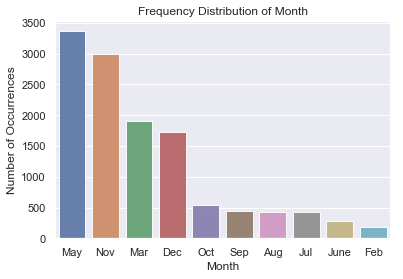

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
p = os['Month'].value_counts()
sns.set(style="darkgrid")
sns.barplot(p.index, p.values, alpha=0.9)
plt.title('Frequency Distribution of Month')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

In [11]:
p = os['Month'].value_counts()
p

grouped = os.groupby(['Month','Revenue'])
grouped.agg(np.size)

Administrative  Administrative_Duration  Informational  \
Month Revenue                                                           
Aug   False               357                    357.0            357   
      True                 76                     76.0             76   
Dec   False              1511                   1511.0           1511   
      True                216                    216.0            216   
Feb   False               181                    181.0            181   
      True                  3                      3.0              3   
Jul   False               366                    366.0            366   
      True                 66                     66.0             66   
June  False               259                    259.0            259   
      True                 29                     29.0             29   
Mar   False              1715                   1715.0           1715   
      True                192                    192.0            192   
May   False              2999                   2999.0           2999   
      True                365                    365.0            365   
Nov   False              2238                   2238.0           2238   
      True                760                    760.0            760   
Oct   False               434                    434.0            434   
      True                115                    115.0            115   
Sep   False               362                    362.0            362   
      True                 86                     86.0             86   

               Informational_Duration  ProductRelated  \
Month Revenue                                           
Aug   False                     357.0             357   
      True                       76.0              76   
Dec   False                    1511.0            1511   
      True                      216.0             216   
Feb   False                     181.0             181   
      True                        3.0               3   
Jul   False                     366.0             366   
      True                       66.0              66   
June  False                     259.0             259   
      True                       29.0              29   
Mar   False                    1715.0            1715   
      True                      192.0             192   
May   False                    2999.0            2999   
      True                      365.0             365   
Nov   False                    2238.0            2238   
      True                      760.0             760   
Oct   False                     434.0             434   
      True                      115.0             115   
Sep   False                     362.0             362   
      True                       86.0              86   

               ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
Month Revenue                                                                
Aug   False                      357.0        357.0      357.0       357.0   
      True                        76.0         76.0       76.0        76.0   
Dec   False                     1511.0       1511.0     1511.0      1511.0   
      True                       216.0        216.0      216.0       216.0   
Feb   False                      181.0        181.0      181.0       181.0   
      True                         3.0          3.0        3.0         3.0   
Jul   False                      366.0        366.0      366.0       366.0   
      True                        66.0         66.0       66.0        66.0   
June  False                      259.0        259.0      259.0       259.0   
      True                        29.0         29.0       29.0        29.0   
Mar   False                     1715.0       1715.0     1715.0      1715.0   
      True                       192.0        192.0      192.0       192.0   
May   False                     2999.0       2999.0     2999.

In [14]:
p = os['VisitorType'].value_counts()
p

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [15]:
p = os['VisitorType'].value_counts()
p

grouped = os.groupby(['VisitorType','Revenue'])
grouped.agg(np.size)

Administrative  Administrative_Duration  \
VisitorType       Revenue                                            
New_Visitor       False              1272                   1272.0   
                  True                422                    422.0   
Other             False                69                     69.0   
                  True                 16                     16.0   
Returning_Visitor False              9081                   9081.0   
                  True               1470                   1470.0   

                           Informational  Informational_Duration  \
VisitorType       Revenue                                          
New_Visitor       False             1272                  1272.0   
                  True               422                   422.0   
Other             False               69                    69.0   
                  True                16                    16.0   
Returning_Visitor False             9081                  9081.0   
                  True              1470                  1470.0   

                           ProductRelated  ProductRelated_Duration  \
VisitorType       Revenue                                            
New_Visitor       False              1272                   1272.0   
                  True                422                    422.0   
Other             False                69                     69.0   
                  True                 16                     16.0   
Returning_Visitor False              9081                   9081.0   
                  True               1470                   1470.0   

                           BounceRates  ExitRates  PageValues  SpecialDay  \
VisitorType       Revenue                                                   
New_Visitor       False         1272.0     1272.0      1272.0      1272.0   
                  True           422.0      422.0       422.0       422.0   
Other             False           69.0       69.0        69.0        69.0   
                  True            16.0       16.0        16.0        16.0   
Returning_Visitor False         9081.0     9081.0      9081.0      9081.0   
                  True          1470.0     1470.0      1470.0      1470.0   

                           Month  OperatingSystems  Browser  Region  \
VisitorType       Revenue                                             
New_Visitor       False     1272              1272     1272    1272   
                  True       422               422      422     422   
Other             False       69                69       69      69   
                  True        16                16       16      16   
Returning_Visitor False     9081              9081     9081    9081   
                  True      1470              1470     1470    1470   

                           TrafficType  Weekend  
VisitorType       Revenue                        
New_Visitor       False           1272     1272  
                  True             422      422  
Other             False             69       69  
                  True              16       16  
Returning_Visitor False           9081     9081  
                  True            1470     1470

In [18]:
p = os['Weekend'].value_counts()
p

False    9462
True     2868
Name: Weekend, dtype: int64

In [19]:

grouped = os.groupby(['Weekend','Revenue'])
grouped.agg(np.size)

Administrative  Administrative_Duration  Informational  \
Weekend Revenue                                                           
False   False              8053                   8053.0           8053   
        True               1409                   1409.0           1409   
True    False              2369                   2369.0           2369   
        True                499                    499.0            499   

                 Informational_Duration  ProductRelated  \
Weekend Revenue                                           
False   False                    8053.0            8053   
        True                     1409.0            1409   
True    False                    2369.0            2369   
        True                      499.0             499   

                 ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
Weekend Revenue                                                                
False   False                     8053.0       8053.0     8053.0      8053.0   
        True                      1409.0       1409.0     1409.0      1409.0   
True    False                     2369.0       2369.0     2369.0      2369.0   
        True                       499.0        499.0      499.0       499.0   

                 SpecialDay  Month  OperatingSystems  Browser  Region  \
Weekend Revenue                                                         
False   False        8053.0   8053              8053     8053    8053   
        True         1409.0   1409              1409     1409    1409   
True    False        2369.0   2369              2369     2369    2369   
        True          499.0    499               499      499     499   

                 TrafficType  VisitorType  
Weekend Revenue                            
False   False           8053         8053  
        True            1409         1409  
True    False           2369         2369  
        True             499          499

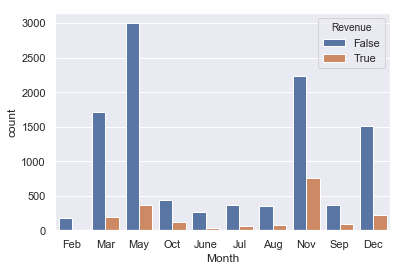

In [22]:
sns.countplot(x='Month',data=os,hue='Revenue')

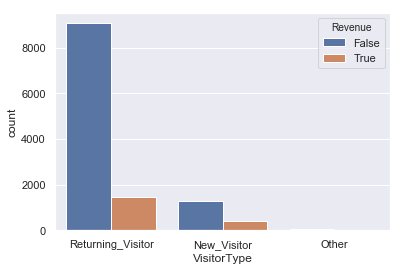

In [44]:
sns.countplot(x='VisitorType',data=os,hue='Revenue')

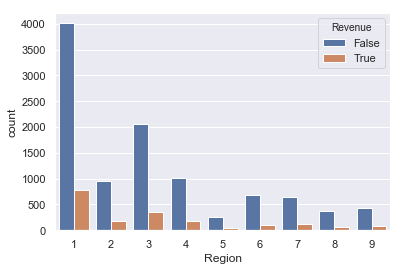

In [45]:
sns.countplot(x='Region',data=os,hue='Revenue')

In [38]:
#sns.stripplot(x="Month",y=p,data=os,jitter=True,hue='Revenue',palette='Set1')

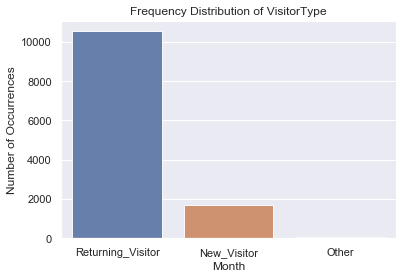

In [43]:
p = os['VisitorType'].value_counts()
sns.set(style="darkgrid")
sns.barplot(p.index, p.values, alpha=0.9)
plt.title('Frequency Distribution of VisitorType')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

# BIVARIANT PLOTTING

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


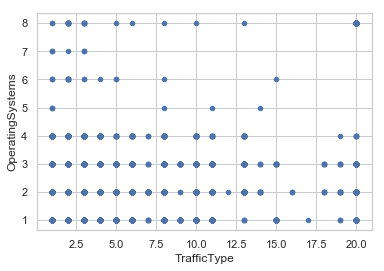

In [37]:
os.plot(kind='scatter',x='TrafficType',y='OperatingSystems')
plt.show()

CONCLUSION:
- we see the number of cases where the axil node is detected patients at various ages
- for most patients the number of axillary nodes detected are less than 10.
- for the most patients where axillary nodes are <5 the age group is 35-75.
- fr the patients where the axillary nodes detected are more that 10 are between the age group 40-70
- but we are unable to make out wheather these people survived long term or not.
So to get a better understanding we use 2-D Scatter plot with color-coding

In [14]:
# COLOR CODED PLOTS USING SEABORN

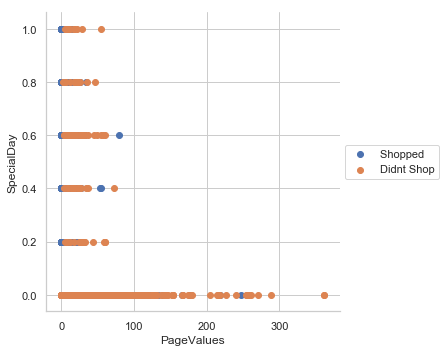

In [307]:
sns.set_style('whitegrid')
sns.FacetGrid(os,hue='Revenue',size=5).map(plt.scatter,'PageValues','SpecialDay')
plt.legend(['Shopped ','Didnt Shop'],loc='center left',bbox_to_anchor=(1,0.5))
plt.show()


In [ ]:
g = sns.FacetGrid(os, col="SpecialDay",  row="PageValues")
g = g.map(plt.scatter, "Revenue", "os", edgecolor="w")

Conclusion from above Plot:
1. When the value of special day is 0 which means the day isn't near any special day it 

# 3D Pair Plot for better understanding

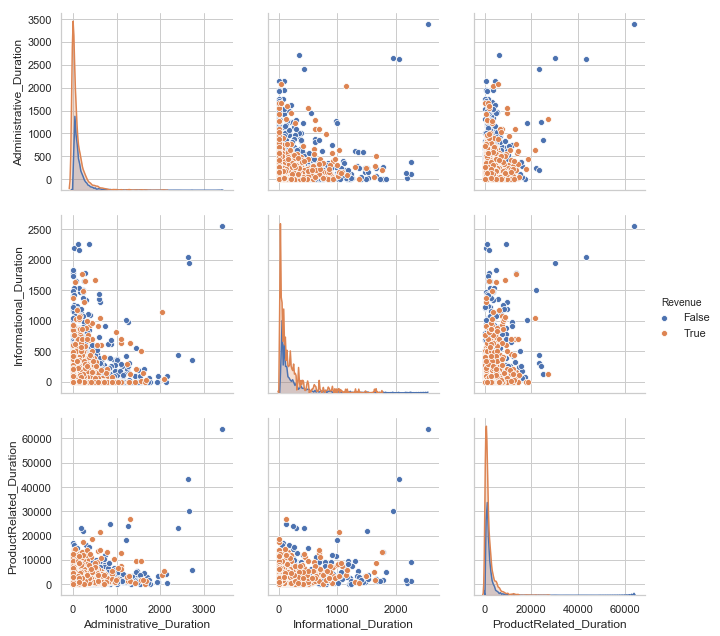

In [25]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(os,vars=['Administrative_Duration',
       'Informational_Duration', 'ProductRelated_Duration'],hue='Revenue',size=3)
plt.show()

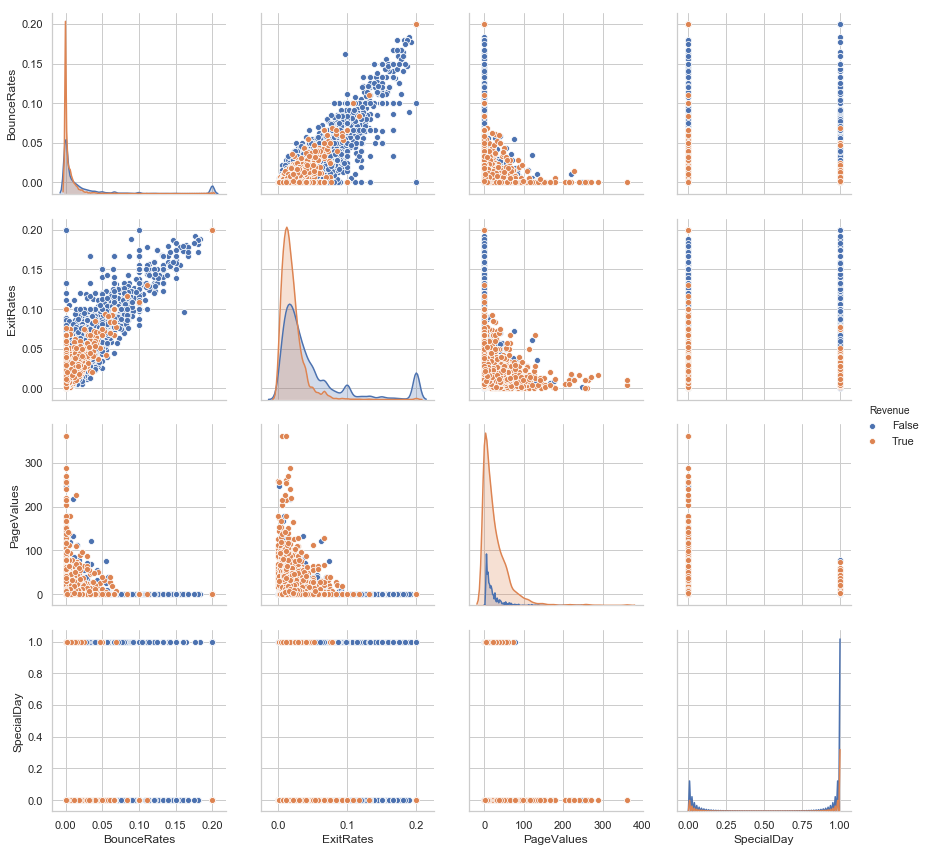

In [28]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(os,vars=['BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],hue='Revenue',size=3)
plt.show()

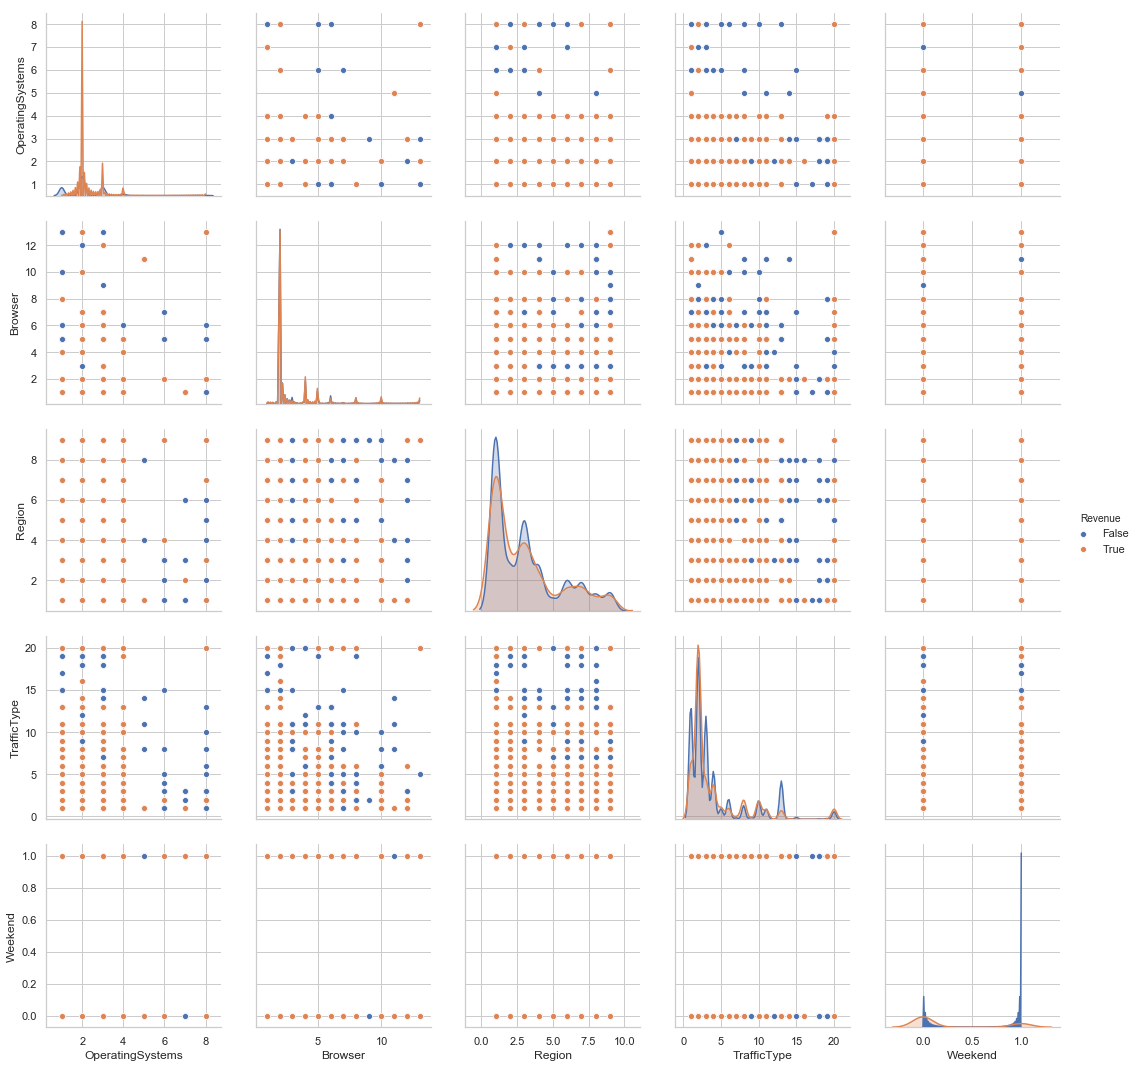

In [29]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(os,vars=['OperatingSystems', 'Browser', 'Region', 'TrafficType', 
       'Weekend'],hue='Revenue',size=3)
plt.show()

CONCLUSION:
The pair plot doesnt serve much contibution in concluding anything as the points are scattered and overlap each other a lot

# #Conclusion:


END-NOTE:
            Couldn't reach any end result as to which could help us predict the Revenue.

In [264]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [265]:
Y=os.Revenue_cat
os.drop(['Revenue','VisitorType','Revenue_cat','Month'], axis=1,inplace=True)

In [266]:
os.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_cat', 'Month_cat'],
      dtype='object')

In [276]:
def model(X,Y,clf):
    X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.3,shuffle=False)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
    c_test=confusion_matrix(y_test,pred)
    class_label=['negative','positive']
    df=pd.DataFrame(c_test,index=class_label,columns=class_label)
    sns.heatmap(df,annot=True,fmt='d')
    plt.title("Test cm")
    plt.xlabel('predicted ')
    plt.ylabel('true')
    plt.show()
    print("Accuracy")
    print(clf.score(X_test,y_test)*100,"%")

(8631, 17) (3699, 17) (8631,) (3699,)


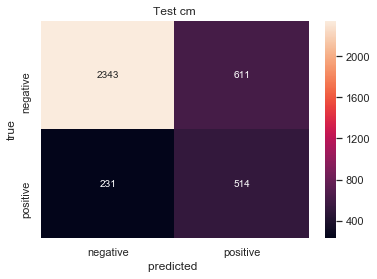

Accuracy
77.23709110570425 %


In [277]:
clf = LinearSVC(random_state=0, tol=1e-5)
X=os.copy()
model(X,Y,clf)

(8631, 17) (3699, 17) (8631,) (3699,)


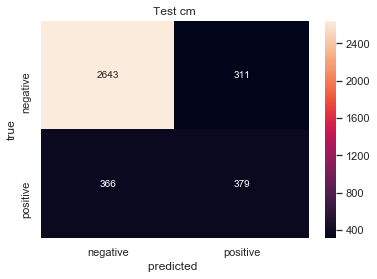

Accuracy
0.816977561503109


In [269]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
model(X,Y,clf)

(8631, 17) (3699, 17) (8631,) (3699,)


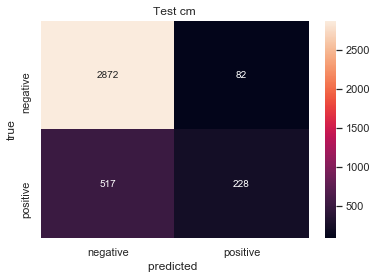

Accuracy
0.8380643417139767


In [272]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
model(X,Y,clf)

(8631, 17) (3699, 17) (8631,) (3699,)


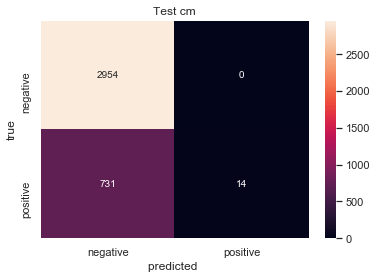

Accuracy
0.8023790213571236


In [273]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
model(X,Y,clf)

(8631, 17) (3699, 17) (8631,) (3699,)


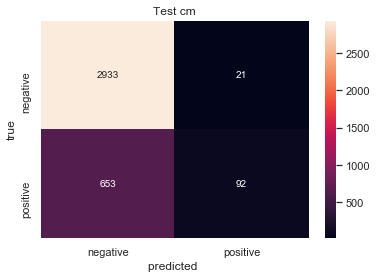

Accuracy
0.8177885915112193


In [274]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=15)
model(X,Y,clf)

(8631, 17) (3699, 17) (8631,) (3699,)


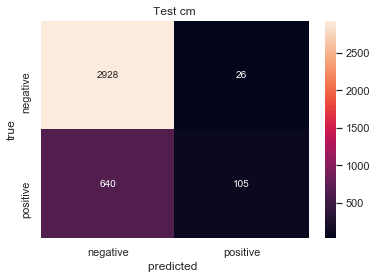

Accuracy
81.99513381995133 %


In [285]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=11)
model(X,Y,clf)

(8631, 17) (3699, 17) (8631,) (3699,)


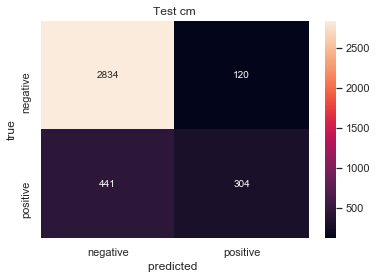

Accuracy
0.8483373884833739


In [275]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=15)
model(X,Y,clf)

(8631, 17) (3699, 17) (8631,) (3699,)


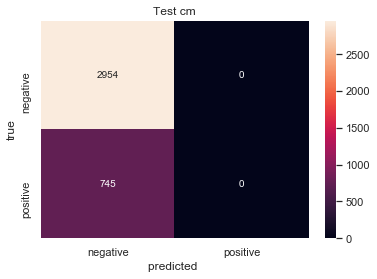

Accuracy
79.85942146526088 %


In [286]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
model(X,Y,clf)

In [210]:
X.columns

Index(['ExitRates', 'VisitorType_cat'], dtype='object')

In [253]:
os.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_cat', 'Month_cat'],
      dtype='object')

In [174]:
df.drop(df.columns[2],axis=1)
X.drop(['Administrative'],axis=1, inplace=True)

So, the accuracy for various models is:
1. RandomForestClassifier- 79.8%
2. DecisionTreeClassifier- 84.8%
3. KNeighborsClassifier(with k=11)-81.9%
4. SGDClassifier -80.2%
5. LogisticRegression -83.8%
6. GausianNB -81.69%
7. LinearSVM -77.2%


so for this particular dataset the DecisionTreeClassifier works fairly well when all the features are taken into consideration without feature engineering.

(8631, 16) (3699, 16) (8631,) (3699,)


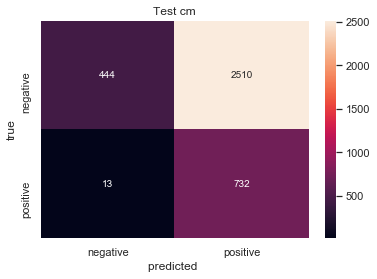

Accuracy
0.31792376317923765
(8631, 16) (3699, 16) (8631,) (3699,)


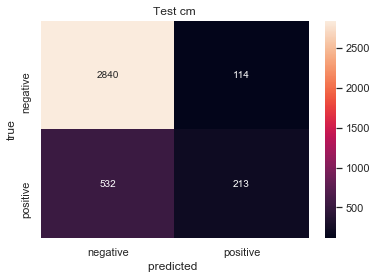

Accuracy
0.8253582049202487
(8631, 16) (3699, 16) (8631,) (3699,)


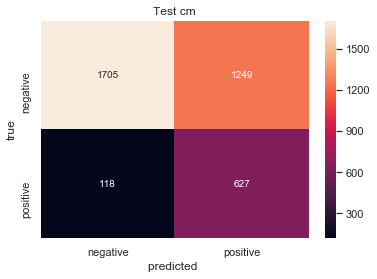

Accuracy
0.6304406596377399
(8631, 16) (3699, 16) (8631,) (3699,)


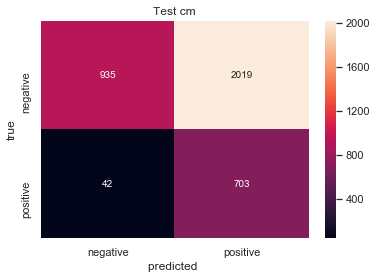

Accuracy
0.44282238442822386
(8631, 16) (3699, 16) (8631,) (3699,)


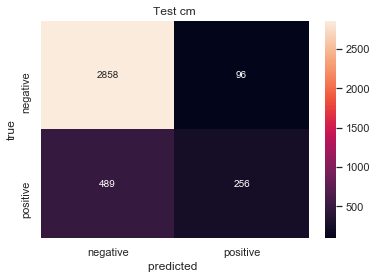

Accuracy
0.8418491484184915
(8631, 16) (3699, 16) (8631,) (3699,)


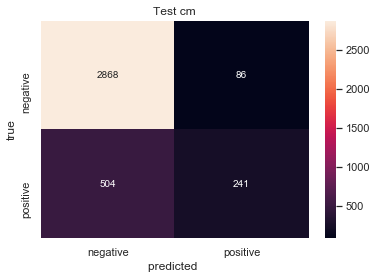

Accuracy
0.8404974317383076
(8631, 16) (3699, 16) (8631,) (3699,)


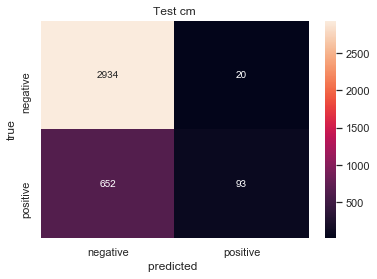

Accuracy
0.8183292781832928
(8631, 16) (3699, 16) (8631,) (3699,)


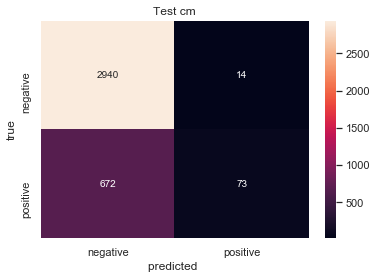

Accuracy
0.8145444714787781
(8631, 16) (3699, 16) (8631,) (3699,)


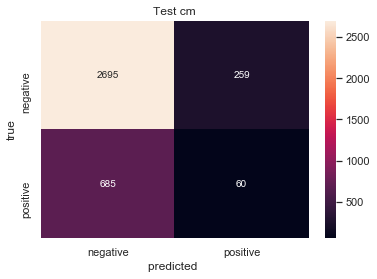

Accuracy
0.7447958907812923
(8631, 16) (3699, 16) (8631,) (3699,)


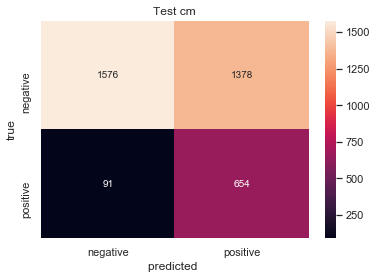

Accuracy
0.6028656393619898
(8631, 16) (3699, 16) (8631,) (3699,)


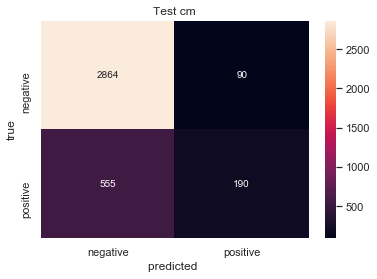

Accuracy
0.8256285482562855
(8631, 16) (3699, 16) (8631,) (3699,)


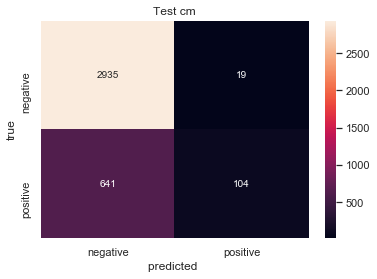

Accuracy
0.8215733982157339
(8631, 16) (3699, 16) (8631,) (3699,)


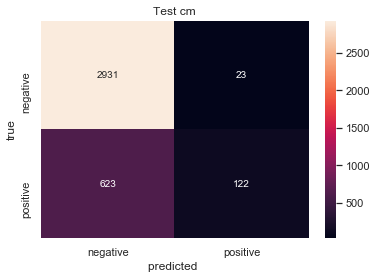

Accuracy
0.8253582049202487
(8631, 16) (3699, 16) (8631,) (3699,)


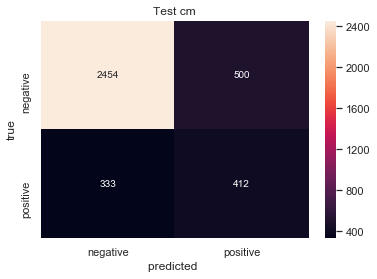

Accuracy
0.7748040010813734
(8631, 16) (3699, 16) (8631,) (3699,)


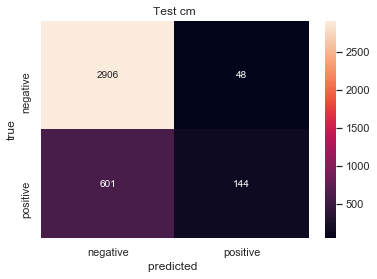

Accuracy
0.8245471749121385
(8631, 16) (3699, 16) (8631,) (3699,)


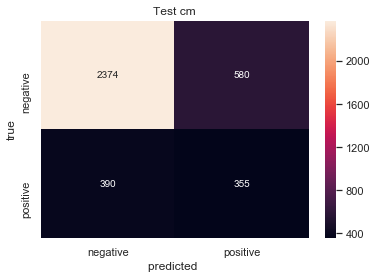

Accuracy
0.7377669640443363
(8631, 16) (3699, 16) (8631,) (3699,)


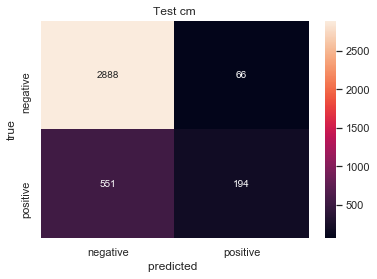

Accuracy
0.8331981616653149


In [250]:
X=os
i=0
l=len(os.columns)
for i in range (0,l):
    X=os.copy()
    X.drop(X.columns[i],axis=1,inplace=True)
    model(X,Y,clf)

With backward feature elmination technique for feature engineering i found that the 'productrelated' and 'TrafficType' are the 2 columns that can eliminated when modeling over the dataset to predict revenue.